In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


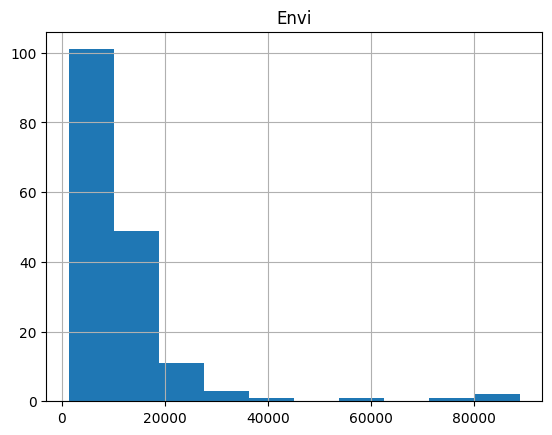

In [4]:
data = df[['Envi']]
data.hist();

## window shift 26 columns

In [5]:
seq_df = window_input_output(26, 26, data)
seq_df

,Envi,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,9300,9203.0,7420.0,3842.0,5179.0,6643.0,11294.0,37448.0,5851.0,1814.0,...,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0,8856.0,3199.0
52,7003,9300.0,9203.0,7420.0,3842.0,5179.0,6643.0,11294.0,37448.0,5851.0,...,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0,8856.0
53,4370,7003.0,9300.0,9203.0,7420.0,3842.0,5179.0,6643.0,11294.0,37448.0,...,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0
54,6052,4370.0,7003.0,9300.0,9203.0,7420.0,3842.0,5179.0,6643.0,11294.0,...,5456.0,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0
55,7581,6052.0,4370.0,7003.0,9300.0,9203.0,7420.0,3842.0,5179.0,6643.0,...,8697.0,5456.0,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8387,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,4401.0,6227.0,...,32779.0,24514.0,12793.0,16051.0,11793.0,9310.0,10129.0,9087.0,14682.0,23363.0
165,5777,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,4401.0,...,22356.0,32779.0,24514.0,12793.0,16051.0,11793.0,9310.0,10129.0,9087.0,14682.0
166,7033,5777.0,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,...,25044.0,22356.0,32779.0,24514.0,12793.0,16051.0,11793.0,9310.0,10129.0,9087.0
167,10539,7033.0,5777.0,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,...,25873.0,25044.0,22356.0,32779.0,24514.0,12793.0,16051.0,11793.0,9310.0,10129.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Envi')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = MultiOutputRegressor(OneVsRestClassifier(SVR(kernel='rbf')))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Envi):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Envi):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Envi): 437724024.713141
Mean Absolute Error (Envi): 11764.764423076924
R-squared (Test score) -12.221409448665955
Train score 1.0


## Visualization

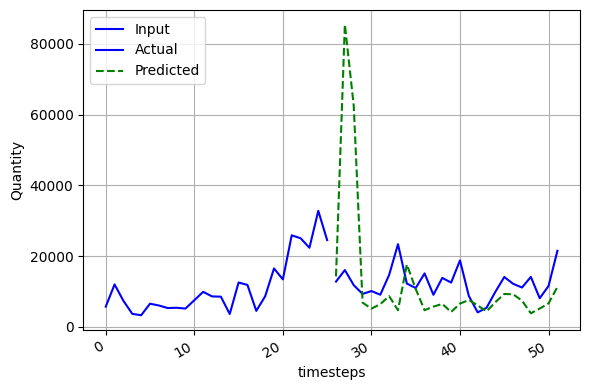

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

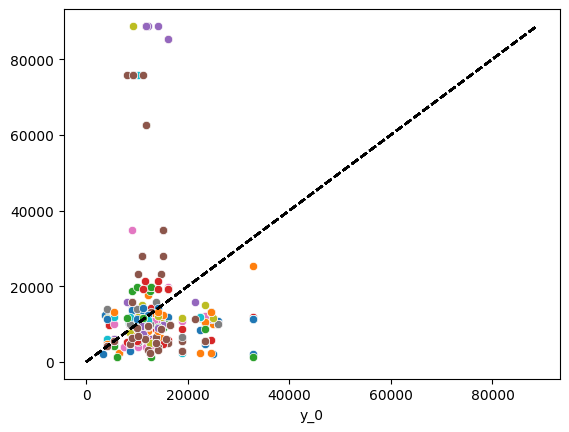

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')